# King County Housing Linear Regression Project


* Student name: Seyma Tas
* Student pace:  Full time
* Scheduled project review date/time: 05-04-2020
* Instructor name: Amber Yandow
* Blog post URL:


## OSEMN Approach
1 - Obtaining the data 2 - Scrubbing the data 3 - Exploring the data 4 - Modeling the data 5 - iNterpreting the results


![title](picture2.png)


## Questions:

1) What are the main factors to predict the price of a house?

2) How much does a middle income family should invest to buy a standard house?
   
   or What are the properties of a house you can buy in King County if your budget is $400,000???
    
3) How can a middle income family increase the price of their house by %20 by spending %5 of the house cost???

4) Basement
 

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
# # Print all the interactive output without resorting to print
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Import the necessary packages

First, we’ll import all of our necessary packages.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm
# import sklearn as sk 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [105]:
# ## Display more information 
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

## Import the data set

Next, we’ll import our data and see what we’re working with. 

In [5]:
df=pd.read_csv('kc_house_data.csv')

Lets see what the data looks like by functions head(), tail(), shape(), info() and describe().

In [ ]:
df.head()

### Drop unnecaessary columns

In [7]:
df=df.drop(['id','date'],axis=1)

# Scraping and cleaning data

In [8]:
df.shape

(21597, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


### Numerical Data Stored as Strings

In [10]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1548.0        1
1852.0        1
415.0         1
1284.0        1
2580.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [11]:
df['sqft_basement']=df['sqft_basement'].map(lambda x:float(x.replace('?', '0')))


In [12]:
#Replace 0 with difference between sqft_above and sqft_living
df['sqft_basement'].replace(to_replace='0', value = abs(df['sqft_living']-df['sqft_above']), inplace=True)


In [13]:
df['bedrooms'].replace(to_replace=33, value =3, inplace=True)


In [14]:
df['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [15]:
df.describe().round(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,540296.6,3.4,2.1,2080.3,15099.4,1.5,0.0,0.2,3.4,7.7,1788.6,285.7,1971.0,83.6,98078.0,47.6,-122.2,1986.6,12758.3
std,367368.1,0.9,0.8,918.1,41412.6,0.5,0.1,0.8,0.7,1.2,827.8,439.8,29.4,399.9,53.5,0.1,0.1,685.2,27274.4
min,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,322000.0,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,645000.0,4.0,2.5,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,550.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,7700000.0,11.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


### Buraya describe ile ilgili yorum yaz
Most houses were build around 1975; sold for $450K; had square footage of living spaces around 1910. You can also note, that distributions of price and variables such as sqft_lot are skewed to the upper tail.



## Detecting and Dealing With Null Values

In [16]:
print(df.isna().sum())

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


### Buraya na values  ile ilgili yorum yaz


# waterfront ve view 

In [17]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [18]:
df['view'].isna().sum()

63

In [19]:
feats = ['view', 'waterfront']
df[feats].corr()

,view,waterfront
view,1.000000,0.406654
waterfront,0.406654,1.000000


In [20]:
print('Number missing both:',
      len(df[(df.view.isnull())
      & (df.waterfront.isnull())]))

Number missing both: 6


In [21]:
len(df[(df.view==2)&(df.waterfront.isna())])

121

In [22]:
len(df[(df.view==3)&(df.waterfront>0)])

14

In [23]:
df['view'].fillna(0,inplace=True)

In [24]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [25]:
df['waterfront'].nunique()

2

In [26]:
df['waterfront'].isna().sum()

2376

In [27]:
df['waterfront'].fillna(0,inplace=True)

In [28]:
feats = ['view', 'waterfront']
df[feats].corr()

,view,waterfront
view,1.000000,0.380543
waterfront,0.380543,1.000000


In [29]:
df.yr_renovated.fillna(0, inplace=True)

### Outliers

In [30]:
# Q1 = df.quantile(0.001)
# Q3 = df.quantile(0.98)
# IQR = Q3 - Q1

# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

## Log transformation of data

In [31]:
non_normal = ['price','sqft_living', 'sqft_lot',
         'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log1p(x))
# pd.plotting.scatter_matrix(df[x_cols], figsize=(10,12));

In [32]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309987,3,1.00,7.074117,8.639588,1.0,0.0,0.0,3,7,7.074117,0.000000,7.578657,0.000000,98178,47.5112,-122.257,7.201171,8.639588
1,13.195616,3,2.25,7.852050,8.887791,2.0,0.0,0.0,3,7,7.682943,5.993961,7.576610,7.596894,98125,47.7210,-122.319,7.433075,8.941153
2,12.100718,2,1.00,6.647688,9.210440,1.0,0.0,0.0,3,6,6.647688,0.000000,7.567346,0.000000,98028,47.7379,-122.233,7.908755,8.995041
3,13.311331,4,3.00,7.581210,8.517393,1.0,0.0,0.0,5,7,6.957497,6.814543,7.583756,0.000000,98136,47.5208,-122.393,7.215975,8.517393
4,13.142168,3,2.00,7.427144,8.997271,1.0,0.0,0.0,3,8,7.427144,0.000000,7.594884,0.000000,98074,47.6168,-122.045,7.496097,8.923191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793862,3,2.50,7.333676,7.031741,3.0,0.0,0.0,3,8,7.333676,0.000000,7.605890,0.000000,98103,47.6993,-122.346,7.333676,7.319865
21593,12.899222,4,2.50,7.745436,8.668024,2.0,0.0,0.0,3,8,7.745436,0.000000,7.608374,0.000000,98146,47.5107,-122.362,7.512618,8.881975
21594,12.904461,2,0.75,6.928538,7.208600,2.0,0.0,0.0,3,7,6.928538,0.000000,7.605890,0.000000,98144,47.5944,-122.299,6.928538,7.604894
21595,12.899222,3,2.50,7.378384,7.778630,2.0,0.0,0.0,3,8,7.378384,0.000000,7.603399,0.000000,98027,47.5345,-122.069,7.252054,7.160846


## Normalizing the data

In [33]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement', 'yr_built','yr_renovated','sqft_living15', 'sqft_lot15']:
    df[feat] = norm_feat(df[feat])


In [34]:
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,13.05,3.37,-0.00,0.00,-0.00,1.49,0.01,0.23,3.41,7.66,0.00,-0.00,0.00,0.00,98077.95,47.56,-122.21,0.00,-0.00
std,0.53,0.90,1.00,1.00,1.00,0.54,0.08,0.76,0.65,1.17,1.00,1.00,1.00,1.00,53.51,0.14,0.14,1.00,1.00
min,11.26,1.00,-2.10,-3.86,-3.03,1.00,0.00,0.00,1.00,3.00,-3.47,-0.79,-2.45,-0.19,98001.00,47.16,-122.52,-4.73,-3.05
25%,12.68,3.00,-0.48,-0.67,-0.52,1.00,0.00,0.00,3.00,7.00,-0.73,-0.79,-0.67,-0.19,98033.00,47.47,-122.33,-0.71,-0.52
50%,13.02,3.00,0.17,0.01,-0.06,1.50,0.00,0.00,3.00,7.00,-0.10,-0.79,0.14,-0.19,98065.00,47.57,-122.23,-0.07,-0.03
75%,13.38,4.00,0.50,0.69,0.32,2.00,0.00,0.00,4.00,8.00,0.72,1.21,0.88,-0.19,98118.00,47.68,-122.12,0.69,0.32
max,15.86,11.00,7.65,4.63,5.91,3.50,1.00,4.00,5.00,13.00,4.11,1.90,1.48,5.30,98199.00,47.78,-121.32,3.65,5.81


In [35]:
df.to_csv("king_county_dataset_cleaned.csv", index=False)


### Dealing with zipcode


## One-Hot Encoding Categorical Columns


#### Identifying Categorical Variables

These columns can be thought as categorical values. Bedrooms, floors, waterfront, wiev, grade, zipcode and year renovated.
Let's explore them one by one.

In [36]:
df['bedrooms'] = df['bedrooms'].astype('category')
df['floors'] = df['floors'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['zipcode'] = df['zipcode'].astype('category')

In [37]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
feats = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15']
df_feats = df[feats]
df_feats_zipcode=df_feats.copy()
df_feats = pd.get_dummies(df_feats, drop_first=True)

In [39]:
df_feats.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)

In [40]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 113 entries, price to zipcode_98199
dtypes: float64(10), uint8(103)
memory usage: 3.8 MB


In [41]:
df_feats.head()

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309987,-1.451039,-1.125564,-0.388490,-0.753624,-0.785188,-0.537412,-0.188883,-1.035420,-0.395502,...,0,0,0,0,0,0,1,0,0,0
1,13.195616,0.174482,0.709416,-0.113302,0.672625,1.112322,-0.674329,5.292283,-0.326861,-0.024341,...,0,0,0,0,0,0,0,0,0,0
2,12.100718,-1.451039,-2.131418,0.244426,-1.752585,-0.785188,-1.293945,-0.188883,1.126525,0.041983,...,0,0,0,0,0,0,0,0,0,0
3,13.311331,1.149794,0.070561,-0.523969,-1.026820,1.372094,-0.196342,-0.188883,-0.990188,-0.545897,...,0,0,0,0,0,0,0,0,0,0
4,13.142168,-0.150622,-0.292847,0.008081,0.073385,-0.785188,0.547945,-0.188883,-0.134305,-0.046448,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_feats.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)

'zipcode', 'lat', 'long',

# Exploring the data

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309987,3,-1.451039,-1.125564,-0.388490,1.0,0.0,0.0,3,7,-0.753624,-0.785188,-0.537412,-0.188883,98178,47.5112,-122.257,-1.035420,-0.395502
1,13.195616,3,0.174482,0.709416,-0.113302,2.0,0.0,0.0,3,7,0.672625,1.112322,-0.674329,5.292283,98125,47.7210,-122.319,-0.326861,-0.024341
2,12.100718,2,-1.451039,-2.131418,0.244426,1.0,0.0,0.0,3,6,-1.752585,-0.785188,-1.293945,-0.188883,98028,47.7379,-122.233,1.126525,0.041983
3,13.311331,4,1.149794,0.070561,-0.523969,1.0,0.0,0.0,5,7,-1.026820,1.372094,-0.196342,-0.188883,98136,47.5208,-122.393,-0.990188,-0.545897
4,13.142168,3,-0.150622,-0.292847,0.008081,1.0,0.0,0.0,3,8,0.073385,-0.785188,0.547945,-0.188883,98074,47.6168,-122.045,-0.134305,-0.046448


In [44]:
df_feats.head()

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309987,-1.451039,-1.125564,-0.388490,-0.753624,-0.785188,-0.537412,-0.188883,-1.035420,-0.395502,...,0,0,0,0,0,0,1,0,0,0
1,13.195616,0.174482,0.709416,-0.113302,0.672625,1.112322,-0.674329,5.292283,-0.326861,-0.024341,...,0,0,0,0,0,0,0,0,0,0
2,12.100718,-1.451039,-2.131418,0.244426,-1.752585,-0.785188,-1.293945,-0.188883,1.126525,0.041983,...,0,0,0,0,0,0,0,0,0,0
3,13.311331,1.149794,0.070561,-0.523969,-1.026820,1.372094,-0.196342,-0.188883,-0.990188,-0.545897,...,0,0,0,0,0,0,0,0,0,0
4,13.142168,-0.150622,-0.292847,0.008081,0.073385,-0.785188,0.547945,-0.188883,-0.134305,-0.046448,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_plot=df[['price', 'bedrooms','bathrooms','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode','lat','long','sqft_living15','sqft_lot15']].copy()

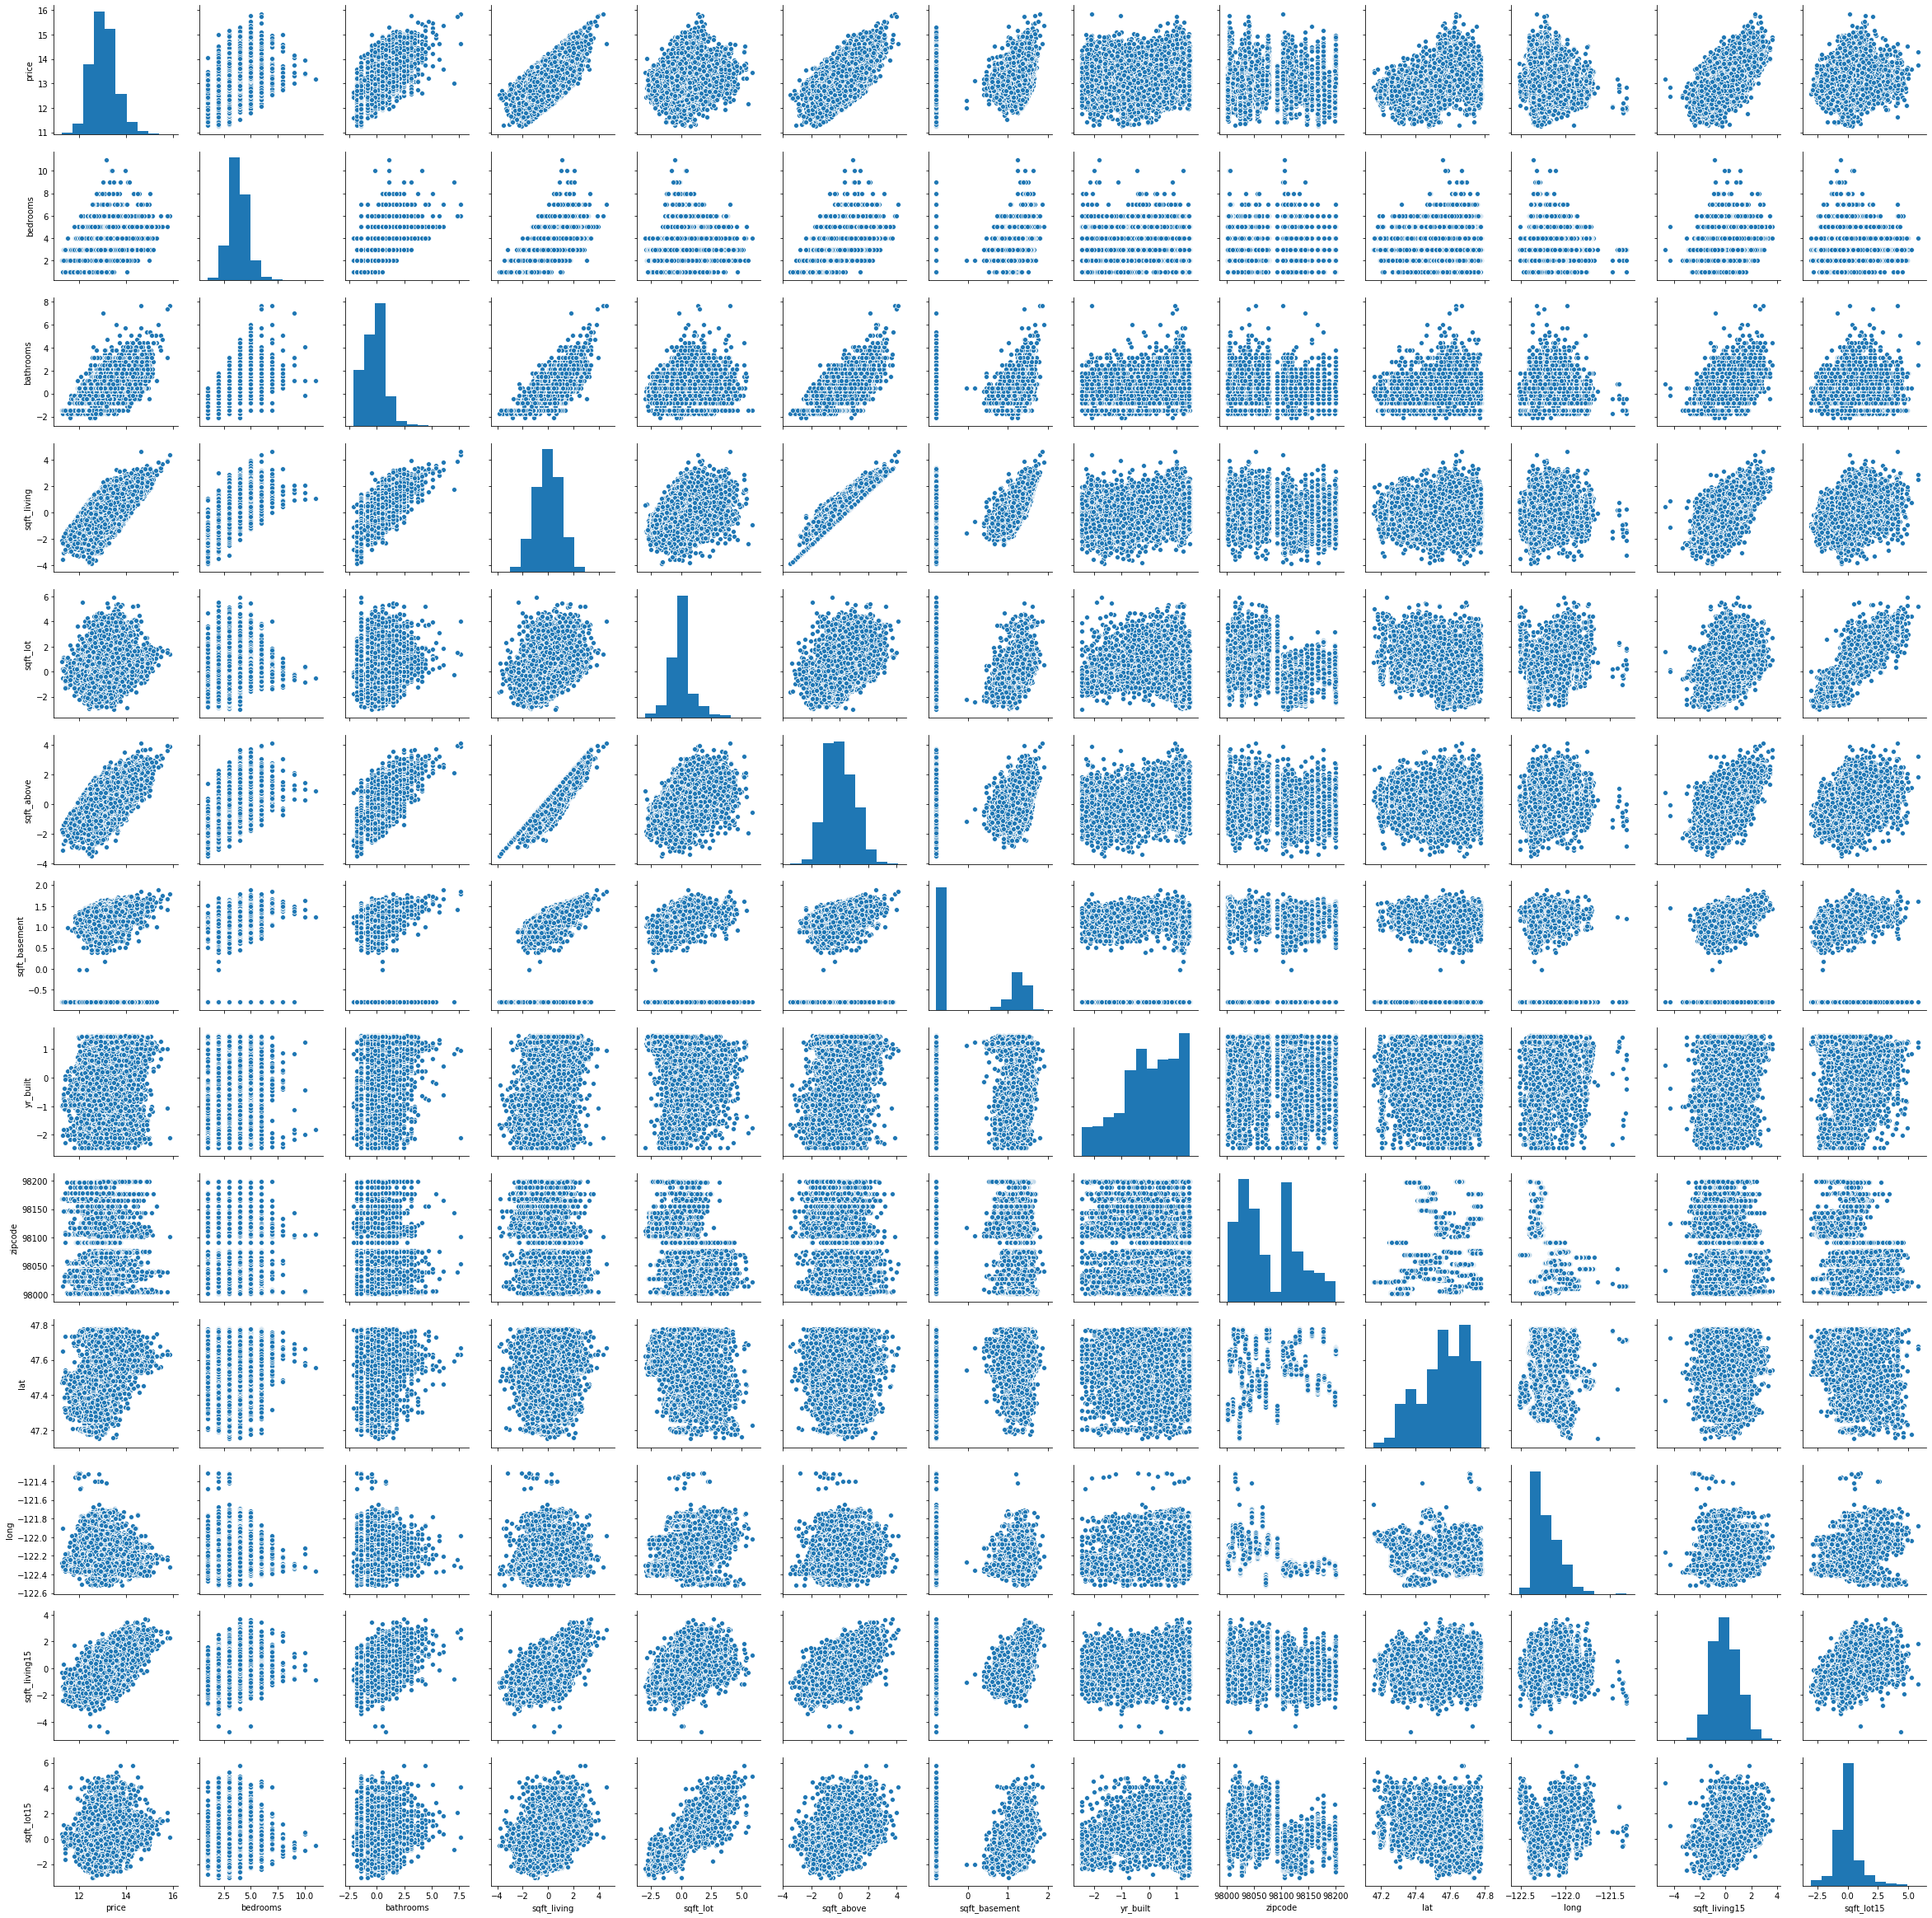

In [46]:
sns.pairplot(df_plot)

## Check for Linearity

jointplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a955990>,
      dtype=object)

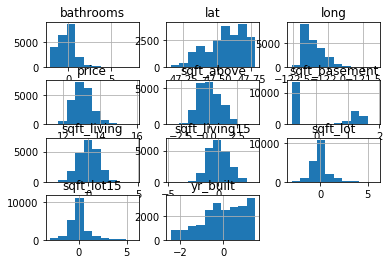

In [47]:
df_plot.hist()

## Check for Multicollinearity

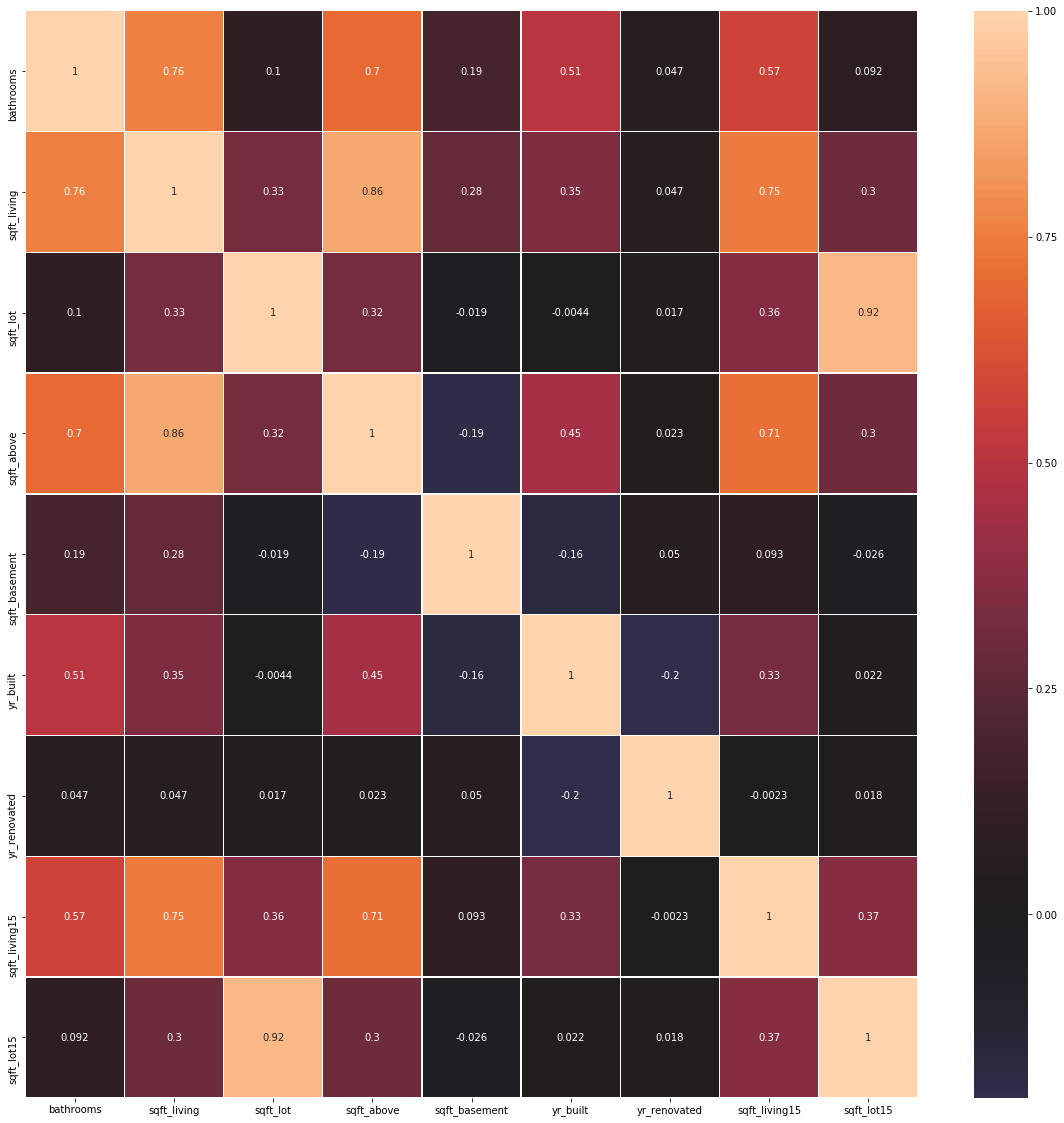

In [48]:
# df_target = df_no_outliers.loc['price']
df_heatmap=df.drop(['price','zipcode', 'lat', 'long'],axis=1)
plt.figure(figsize=(20,20))
ax=sns.heatmap(df_heatmap.corr(), center=0, linewidths=.5,annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [49]:
df_heatmap.corr() > 0.75


,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bathrooms,True,True,False,False,False,False,False,False,False
sqft_living,True,True,False,True,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,True
sqft_above,False,True,False,True,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False
yr_built,False,False,False,False,False,True,False,False,False
yr_renovated,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,False,False,False,False,False,True,False
sqft_lot15,False,False,True,False,False,False,False,False,True


In [50]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 113 entries, price to zipcode_98199
dtypes: float64(10), uint8(103)
memory usage: 3.8 MB


In [51]:
# # df=df.drop(['sqft_living'], axis=1)
# df_feats=df_feats.drop(['sqft_living'], axis=1)
# df_feats=df_feats.drop(['sqft_living'], axis=1)

In [52]:
len(df_feats.columns)

113

In [53]:
113-70


43

In [54]:
print(df_feats.columns[30:])

Index(['condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105

# Modeling the data

## Baseline Model 

In [55]:
outcome = 'price'
x_cols = ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'waterfront_1_0', 'view_1_0', 'view_2_0', 'view_3_0',
       'view_4_0', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']


In [56]:
# df_feats.columns = [col.replace('.', '_', inplace=True) for col in df_feats.columns]
# df_feats.columns = [col.replace(' ', '_', inplace=True) for col in df_feats.columns]
df_feats.columns = df_feats.columns.str.replace(r"[.]", "_")

In [57]:
df_feats.columns[:50]

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'waterfront_1_0', 'view_1_0', 'view_2_0', 'view_3_0',
       'view_4_0', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007'],
      dtype='object')

In [58]:
df_feats.columns[50:]

Index(['zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', '

In [59]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_feats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.758e+28
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:54:07   Log-Likelihood:             6.3370e+05
No. Observations:               21597   AIC:                        -1.267e+06
Df Residuals:                   21483   BIC:                        -1.266e+06
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -7.372e-14   4.96e-14     -1.488      0.137   -1.71e-13    2.34e-14
price              1.0000   1.67e-15   5.98e+14      0.000       1.000       1.000
bathrooms       2.776e-16   5.63e-16      0.493      0.622   -8.25e-16    1.38e-15
sqft_living    -5.274e-16   1.48e-15     -0.357      0.721   -3.42e-15    2.37e-15
sqft_lot        4.441e-16   8.06e-16      0.551      0.582   -1.14e-15    2.02e-15
sqft_above     -3.331e-16   1.46e-15     -0.228      0.820    -3.2e-15    2.53e-15
sqft_basement  -9.506e-16   7.16e-16     -1.328      0.184   -2.35e-15    4.53e-16
yr_built       -2.637e-16   5.71e-16     -0.461      0.645   -1.38e-15    8.56e-16
yr_renovated   -2.793e-16   3.21e-16     -0.869      0.385   -9.09e-16    3.51e-16
sqft_living15   1.388e-16   5.44e-16      0.255      0.799   -9.27e-16     1.2e-15
sqft_lot15     -4.441e-16   7.92e-16     -0.561      0.575      -2e-15    1.11e-15
bedrooms_2     -4.441e-16   3.35e-15     -0.133      0.895   -7.01e-15    6.12e-15
bedrooms_3       1.11e-15   3.38e-15      0.329      0.742   -5.51e-15    7.73e-15
bedrooms_4     -3.331e-16   3.48e-15     -0.096      0.924   -7.15e-15    6.48e-15
bedrooms_5     -1.277e-15   3.67e-15     -0.348      0.728   -8.47e-15    5.91e-15
bedrooms_6     -1.332e-15   4.45e-15     -0.299      0.765   -1.01e-14    7.39e-15
bedrooms_7     -4.441e-15   8.03e-15     -0.553      0.580   -2.02e-14    1.13e-14
bedrooms_8      3.775e-15   1.28e-14      0.295      0.768   -2.13e-14    2.89e-14
bedrooms_9     -3.109e-15   1.84e-14     -0.169      0.866   -3.92e-14     3.3e-14
bedrooms_10     4.885e-15   2.56e-14      0.191      0.849   -4.54e-14    5.51e-14
bedrooms_11     -9.77e-15   4.41e-14     -0.222      0.825   -9.62e-14    7.67e-14
floors_1_5     -3.331e-16   1.24e-15     -0.268      0.789   -2.77e-15    2.11e-15
floors_2_0     -6.037e-16   1.06e-15     -0.570      0.568   -2.68e-15    1.47e-15
floors_2_5     -2.442e-15   3.68e-15     -0.663      0.507   -9.66e-15    4.77e-15
floors_3_0      -2.22e-16   2.34e-15     -0.095      0.924    -4.8e-15    4.36e-15
floors_3_5      1.421e-14   1.68e-14      0.848      0.397   -1.87e-14    4.71e-14
waterfront_1_0 -1.055e-15   4.58e-15     -0.230      0.818      -1e-14    7.93e-15
view_1_0       -6.106e-16   2.51e-15     -0.244      0.807   -5.52e-15     4.3e-15
view_2_0         1.11e-16   1.53e-15      0.072      0.942    -2.9e-15    3.12e-15
view_3_0        -1.11e-16   2.09e-15     -0.053      0.958   -4.22e-15    3.99e-15
view_4_0        5.829e-16   3.18e-15      0.184      0.854   -5.64e-15    6.81e-15
condition_2     -4.33e-15   8.87e-15     -0.488      0.625   -2.17e-14    1.31e-14
condition_3     1.055e-15   8.27e-15      0.128      0.898   -1.52e-14    1.73e-14
condition_4     3.386e-15   8.28e-15      0.409      0.682   -1.28e-14    1.96e-14
condition_5 

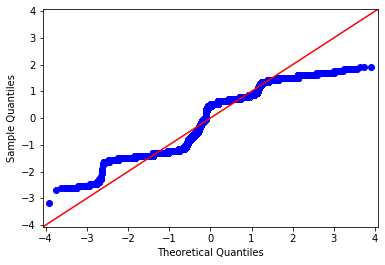

In [60]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

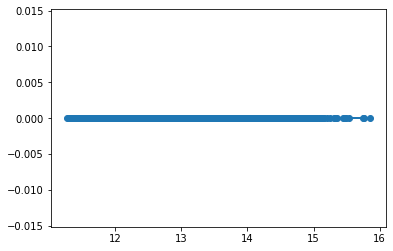

In [61]:
plt.scatter(model.predict(df_feats[x_cols]), model.resid)
plt.plot(model.predict(df_feats[x_cols]), [0 for i in range(len(df_feats))])

In [62]:
X = df_feats[x_cols]

In [63]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('price', 4386.962535709317),
 ('bathrooms', 3.5534852688780654),
 ('sqft_living', 24.462565823685736),
 ('sqft_lot', 7.2934416491782175),
 ('sqft_above', 23.93023282888136),
 ('sqft_basement', 5.763914995934781),
 ('yr_built', 3.6709696205819276),
 ('yr_renovated', 1.160282650047032),
 ('sqft_living15', 3.3150864969328406),
 ('sqft_lot15', 7.042792047029885),
 ('bedrooms_2', 16.113354659129115),
 ('bedrooms_3', 58.34014880685184),
 ('bedrooms_4', 43.2663569164519),
 ('bedrooms_5', 11.211172018073109),
 ('bedrooms_6', 2.8047635132954563),
 ('bedrooms_7', 1.2757920751078238),
 ('bedrooms_8', 1.1102710414367578),
 ('bedrooms_9', 1.0617158257493176),
 ('bedrooms_10', 1.0259325067123528),
 ('bedrooms_11', 1.011957185347485),
 ('floors_1_5', 1.5410709769887503),
 ('floors_2_0', 4.798940116155275),
 ('floors_2_5', 1.1360168447768926),
 ('floors_3_0', 1.732111622998986),
 ('floors_3_5', 1.0242727968295224),
 ('waterfront_1_0', 1.5895806178530292),
 ('view_1_0', 1.0771435554078421),
 ('view_2

## Perform stepwise selection

In [64]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [65]:
X = df_feats.drop('price', axis=1)
y = df_feats['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is dep

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is dep

Add  grade_7                        with p-value 0.0


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is dep

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is dep

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is dep

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  sqft_living15                  with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  grade_6                        with p-value 1.29491e-262
Add  zipcode_98023                  with p-value 2.9176e-220
Drop sqft_above                     with p-value 0.0851552


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zipcode_98004                  with p-value 2.63723e-218
Add  grade_8                        with p-value 3.5299e-203
Add  grade_5                        with p-value 0.0
Add  bathrooms                      with p-value 2.22754e-156
Add  waterfront_1_0                 with p-value 1.76411e-132
Add  zipcode_98042                  with p-value 5.11595e-129
Add  zipcode_98092                  with p-value 3.45907e-139
Add  zipcode_98003                  with p-value 4.89724e-135
Add  grade_9                        with p-value 4.05678e-109
Add  sqft_lot15                     with p-value 3.68106e-112
Add  zipcode_98030                  with p-value 1.59736e-99
Add  zipcode_98058                  with p-value 7.51302e-106
Add  zipcode_98031                  with p-value 2.85564e-113
Add  zipcode_98198                  with p-value 1.62175e-116
Add  zipcode_98038                  with p-value 1.60734e-123
Add  zipcode_98168                  with p-value 4.50255e-121
Add  zipcode_98002 

In [66]:
len(x_cols)

113

In [67]:
len(x_cols)

113

In [68]:
a=['sqft_living', 'waterfront_1_0', 'zipcode_98004', 'zipcode_98039', 'zipcode_98112', 
          'zipcode_98040', 'grade_12', 'grade_13', 'grade_11', 'grade_10', 'grade_9', 'grade_8',
          'zipcode_98033', 'zipcode_98023', 'view_4_0', 'zipcode_98105', 'zipcode_98119', 
          'zipcode_98199', 'zipcode_98103', 'zipcode_98115', 'zipcode_98117', 'zipcode_98109',
          'zipcode_98107', 'zipcode_98102', 'zipcode_98122', 'view_3_0', 'zipcode_98116', 
          'zipcode_98052', 'zipcode_98006', 'zipcode_98144', 'zipcode_98008', 'zipcode_98005',
          'zipcode_98053', 'zipcode_98034', 'zipcode_98136', 'zipcode_98029', 'zipcode_98092', 
          'zipcode_98125', 'zipcode_98177', 'condition_5', 'zipcode_98007', 'zipcode_98126', 
          'zipcode_98074', 'zipcode_98075', 'zipcode_98027', 'zipcode_98133', 'view_2_0', 
          'zipcode_98118', 'zipcode_98072', 'zipcode_98155', 'sqft_above', 'view_1_0', 
          'yr_renovated', 'zipcode_98028', 'sqft_lot', 'zipcode_98106', 'zipcode_98011', 
          'condition_4', 'sqft_living15', 'bedrooms_3', 'zipcode_98108', 'floors_3_0',
          'floors_2_0', 'bathrooms', 'zipcode_98146', 'zipcode_98056', 'zipcode_98024', 
          'zipcode_98077', 'zipcode_98065', 'zipcode_98059', 'zipcode_98045', 
          'zipcode_98019', 'bedrooms_2', 'zipcode_98014', 'zipcode_98166', 'zipcode_98168',
          'bedrooms_7', 'yr_built', 'floors_2_5', 'bedrooms_9', 'zipcode_98038', 
          'zipcode_98055', 'zipcode_98058', 'zipcode_98010', 'bedrooms_10', 'zipcode_98148',
          'sqft_lot15', 'zipcode_98178']
a.sort()
a

['bathrooms',
 'bedrooms_10',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_7',
 'bedrooms_9',
 'condition_4',
 'condition_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_8',
 'grade_9',
 'sqft_above',
 'sqft_living',
 'sqft_living15',
 'sqft_lot',
 'sqft_lot15',
 'view_1_0',
 'view_2_0',
 'view_3_0',
 'view_4_0',
 'waterfront_1_0',
 'yr_built',
 'yr_renovated',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'z

## Model Refinement I

In [69]:
outcome = 'price'
x_cols = ['bathrooms',
 'bedrooms_10','bedrooms_2','bedrooms_3','bedrooms_7','bedrooms_9',
 'condition_4','condition_5',
 'floors_2_0','floors_2_5','floors_3_0',
 'grade_10','grade_11','grade_12','grade_13','grade_8','grade_9',
 'sqft_above',
 'sqft_living',
 'sqft_living15',
 'sqft_lot',
 'sqft_lot15',
 'view_1_0',
 'view_2_0',
 'view_3_0',
 'view_4_0',
 'waterfront_1_0',
 'yr_built',
 'yr_renovated',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98136',
 'zipcode_98144',
 'zipcode_98146',
 'zipcode_98148',
 'zipcode_98155',
 'zipcode_98166',
 'zipcode_98168',
 'zipcode_98177',
 'zipcode_98178',
 'zipcode_98199']

In [70]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_feats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1806.
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:59:27   Log-Likelihood:                 6174.0
No. Observations:               21597   AIC:                        -1.217e+04
Df Residuals:                   21508   BIC:                        -1.146e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.4995      0.005   2707.668      0.000      12.490      12.509
bathrooms          0.0280      0.002     12.264      0.000       0.024       0.032
bedrooms_10       -0.2283      0.105     -2.165      0.030      -0.435      -0.022
bedrooms_2         0.0257      0.005      5.097      0.000       0.016       0.036
bedrooms_3         0.0111      0.003      3.632      0.000       0.005       0.017
bedrooms_7        -0.1577      0.030     -5.280      0.000      -0.216      -0.099
bedrooms_9        -0.2024      0.075     -2.695      0.007      -0.350      -0.055
condition_4        0.0453      0.003     14.047      0.000       0.039       0.052
condition_5        0.1125      0.005     22.053      0.000       0.102       0.122
floors_2_0        -0.0150      0.004     -3.565      0.000      -0.023      -0.007
floors_2_5         0.0021      0.015      0.139      0.889      -0.028       0.032
floors_3_0        -0.0920      0.010     -9.645      0.000      -0.111      -0.073
grade_10           0.2729      0.008     35.847      0.000       0.258       0.288
grade_11           0.3802      0.011     33.727      0.000       0.358       0.402
grade_12           0.4970      0.021     23.604      0.000       0.456       0.538
grade_13           0.7383      0.052     14.218      0.000       0.637       0.840
grade_8            0.0839      0.004     22.986      0.000       0.077       0.091
grade_9            0.1901      0.005     34.606      0.000       0.179       0.201
sqft_above         0.0608      0.003     18.634      0.000       0.054       0.067
sqft_living        0.1297      0.003     38.050      0.000       0.123       0.136
sqft_living15      0.0501      0.002     22.717      0.000       0.046       0.054
sqft_lot           0.0620      0.003     18.763      0.000       0.056       0.068
sqft_lot15        -0.0117      0.003     -3.586      0.000      -0.018      -0.005
view_1_0           0.1198      0.010     11.584      0.000       0.100       0.140
view_2_0           0.1065      0.006     16.882      0.000       0.094       0.119
view_3_0           0.1837      0.009     21.444      0.000       0.167       0.201
view_4_0           0.2857      0.013     21.948      0.000       0.260       0.311
waterfront_1_0     0.4798      0.019     25.747      0.000       0.443       0.516
yr_built           0.0087      0.002      3.899      0.000       0.004       0.013
yr_renovated       0.0143      0.001     10.785      0.000       0.012       0.017
zipcode_98004      1.0774      0.011     96.810      0.000       1.056       1.099
zipcode_98005      0.6783      0.015     46.145      0.000       0.649       0.707
zipcode_98006      0.5905      0.009     63.910      0.000       0.572       0.609
zipcode_98007      0.6135      0.016     38.769      0.000       0.583       0.645
zipcode_9800

In [71]:
X = df_feats[x_cols]

In [72]:
X.head()

,bathrooms,bedrooms_10,bedrooms_2,bedrooms_3,bedrooms_7,bedrooms_9,condition_4,condition_5,floors_2_0,floors_2_5,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98199
0,-1.451039,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.174482,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.451039,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.149794,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.150622,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


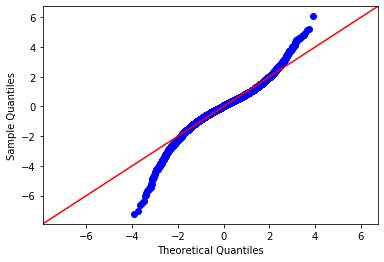

In [73]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

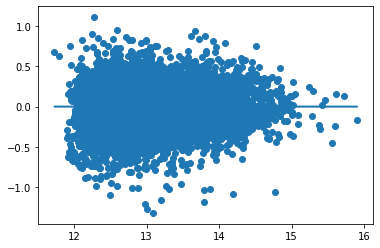

In [74]:
plt.scatter(model.predict(df_feats[x_cols]), model.resid)
plt.plot(model.predict(df_feats[x_cols]), [0 for i in range(len(df_feats))])

In [75]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 3.3701765025198553),
 ('bedrooms_10', 1.0051020849972836),
 ('bedrooms_2', 2.045551044483555),
 ('bedrooms_3', 2.4245299718584277),
 ('bedrooms_7', 1.0210190747032584),
 ('bedrooms_9', 1.0195360340078288),
 ('condition_4', 1.6177891552204857),
 ('condition_5', 1.2843935625841123),
 ('floors_2_0', 3.908526956914733),
 ('floors_2_5', 1.105170476541404),
 ('floors_3_0', 1.663831583340258),
 ('grade_10', 1.9435716320577296),
 ('grade_11', 1.5076488555393914),
 ('grade_12', 1.1834697484566694),
 ('grade_13', 1.054669467673778),
 ('grade_8', 2.3130021919661155),
 ('grade_9', 2.302797065631349),
 ('sqft_above', 6.794294053300956),
 ('sqft_living', 7.533609065066101),
 ('sqft_living15', 3.11793267880426),
 ('sqft_lot', 7.013870420110345),
 ('sqft_lot15', 6.923986161704461),
 ('view_1_0', 1.0630557344355207),
 ('view_2_0', 1.14594002444457),
 ('view_3_0', 1.1209680987839366),
 ('view_4_0', 1.6188333616214132),
 ('waterfront_1_0', 1.5274683020315998),
 ('yr_built', 3.2408374120090

## Cross Validation

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))
# df_feats=df_feats.reshape((1130, 21597))

cross_val_score(linreg, predictors, df_feats['price'], scoring='neg_mean_squared_error')
cv_10_res_mean = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_10_res_std = np.std(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))







ValueError: Found input variables with inconsistent numbers of samples: [1130, 21597]

In [84]:
X_train.shape

(17277, 88)

In [98]:
y_train.shape

(17277,)

In [99]:
X_test.shape

(4320, 88)

In [100]:
y_test.shape

(4320,)

In [104]:
type(y_train)

pandas.core.series.Series

## Model Refinement II Location! Location! Location!

In [ ]:
income_df=df_feats.copy()

In [ ]:
from uszipcode import SearchEngine, Zipcode


In [ ]:
search = SearchEngine(simple_zipcode=False)

In [ ]:
zipcode = search.by_zipcode("98040")
zipcode.median_household_income

In [ ]:
def zco(x):
    income = search.by_zipcode(x)
    
    return income.median_household_income if income else x
   

In [ ]:
income_df['income'] = income_df['zipcode'].astype(int).astype(str).apply(zco)

In [ ]:
income_df.head()

In [ ]:
sns.jointplot(x='price', y='income',data=income_df,height=9)

In [ ]:
income_df['income'][0]

In [ ]:
income_df['income'][1]

In [ ]:
income_df['income'].nunique()

In [ ]:
income_df.columns

#### Normalize income

In [ ]:
type(income_df['income'][0])

In [ ]:

for feat in ['bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement', 'yr_built','yr_renovated','sqft_living15', 'sqft_lot15']:
    df[feat] = norm_feat(df[feat])


In [ ]:
income_df['income']= norm_feat(income_df['income'])

In [ ]:
outcome = 'price'
x_cols = ['bathrooms', 'sqft_living', 
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15',  'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
        'bedrooms_11', 'floors_1_5', 'floors_2_0', 'floors_2_5',
       'floors_3_0', 'floors_3_5', 'waterfront_1_0', 'view_1_0', 'view_2_0',
       'view_3_0', 'view_4_0', 'condition_2', 'condition_3', 'condition_4',
       'condition_5',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'income']


In [ ]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=income_df).fit()
model.summary()

## Checking for normality

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Checking for Homoscedasticity¶

In [ ]:
plt.scatter(model.predict(income_df[x_cols]), model.resid)
plt.plot(model.predict(income_df[x_cols]), [0 for i in range(len(income_df))])

## Checking for Multicollinearity¶

In [ ]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

## Model refinement 3

## notes


basement to new feature



subsampling

regularisation 



future work:  garaj, pool, okul gradeleri

## web sites
hexbins with longitude and latitude 
https://medium.com/@mattheweparker/visualizing-data-with-hexbins-in-python-39823f89525e  

categorigal data 
https://medium.com/@rabinpoudyal1995/encoding-categorical-data-in-python-fab150d6e21b

All houses are sold within 390 days, therefore I will not need to adjust the price.
https://github.com/Burton-David/KingsCountyHousingLR/blob/master/student.ipynb




https://www.incomebyzipcode.com/washington/98109

https://medium.com/@allisonkelly42/exploratory-data-analysis-with-the-king-county-housing-data-c6d3f7eadc57

https://www.listendata.com/2018/01/linear-regression-in-python.html#Important-Model-Performance-Metrics

In [ ]:
cross validation mse smf model




qq plot yerine omnibus value

https://www.zillow.com/bellevue-wa-98004/
https://www.zillow.com/mercer-island-wa-98040/
https://www.zillow.com/medina-wa-98039/
https://www.zillow.com/seattle-wa-98112/

fig = plt.figure(figsize = (15,8))
fig = sns.boxplot(x='zipcode', y='price', data=kc_df_mcf, showfliers = False)
plt.title('Prices of Houses Sold in King County by Zip Code')
plt.xlabel("Zip Code")
plt.xticks(rotation=90)
plt.ylabel('Sale Price, $')
plt.show()
